# TF-co-occurences for WP2 - Data
### Outline of this notebook:
    1. Constants, Path and Interface Definitions 
    2. Market Basket analysis with tf-comb, for all cluster/celltypes of a tissue
    3. Differential analysis with all market basket analysis (CombObj ´s) of step 2 for the clusters/celltypes of a single tissue. (One DiffCombObj for each tissue)
    4. Analysis for biological questions 

### Constants, Path and Interface Definitions:

In [128]:
from tfcomb import CombObj, DiffCombObj, utils
import os
import pathlib
import pandas as pd
import numpy as np
'''
Constants for this script
'''

#genome_path="../testdaten/hg19_masked.fa"
#genome_path="../testdaten/homo_sapiens.104.mainChr.fa"
genome_path="/mnt/workspace_stud/allstud/homo_sapiens.104.mainChr.fa"

main_jaspar_file="../testdaten/JASPAR2020_CORE_vertebrates.meme" 

# path where market basket analyses for cluster are put.
result_path="./results/wp2/"
main_analysis_path=f"{result_path}main/"
differential_analysis_path=f"{result_path}diff_analysis/"

differential_analysis_selection_path=f"{differential_analysis_path}selection/"
answers_path=f"{result_path}answers/"

### folder of wp2, where the clusters are
#path_to_clusters="../testdaten/wp2/"
#path_to_clusters="/mnt/workspace_stud/stud3/WP6_data/"
#path_to_clusters="/mnt/workspace_stud/stud4/WP6_data/"
path_to_clusters="/mnt/workspace_stud/stud3/WP2_OUTPUT/FINISHED/"
path_to_tissues="/mnt/workspace_stud/stud3/WP2_OUTPUT/FINISHED/"
#/mnt/workspace_stud/stud3/WP2_OUTPUT/FINISHED/JF1O6_body_of_pancreas/
cluster_folder_tag="WP6/"

# create result folders 
if not os.path.exists(result_path):
     pathlib.Path(result_path).mkdir(parents=True, exist_ok=True)

if not os.path.exists(main_analysis_path):
     pathlib.Path(main_analysis_path).mkdir(parents=True, exist_ok=True)

if not os.path.exists(differential_analysis_path):
     pathlib.Path(differential_analysis_path).mkdir(parents=True, exist_ok=True)

if not os.path.exists(answers_path):
     pathlib.Path(answers_path).mkdir(parents=True, exist_ok=True)

if not os.path.exists(differential_analysis_selection_path):
     pathlib.Path(differential_analysis_selection_path).mkdir(parents=True, exist_ok=True)

if not os.path.exists(genome_path):
    print(f"ERROR: path {genome_path} does not exist")

if not os.path.exists(main_jaspar_file):
    print(f"ERROR: path {main_jaspar_file} does not exist")

if not os.path.exists(path_to_clusters):
    print(f"ERROR: path {path_to_clusters} does not exist")


### Helper functions for reading-in folders/files:

In [130]:
def get_folder_names_in_folder(main_folder_path:str):
    #glob()

    dirlist = [ item for item in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, item))]
    folder_names = []
    for folder in dirlist:
        folder_names.append(folder)
    return folder_names

def read_in_file_names_of_folder(rel_path:str):
    return [f for f in os.listdir(rel_path) if os.path.isfile(os.path.join(rel_path, f))]


#cluster_file_names = read_in_file_names_of_folder(rel_path=path_to_clusters)






## Market basket analysis with tf-comb
1. Read-in tissue folders
2. For each tissue: read-in single .bed files for each cluster/celltype
3. Do market basket analysis for each cluster/celltype
4. Result .pkl CombObj files can be found under **/{result_path}/{main_analysis_path}/{tissue_name}/{cluster_name}.pkl **

In [129]:
def do_market_basket_analyses_for_cell_cluster(cell_cluster_name: str, cell_cluster_path:str, tissue:str):
    '''
        Does market basket analyses.
    '''    
    save_path = f'{main_analysis_path}{tissue}/'
    if not os.path.exists(save_path):
         pathlib.Path(save_path).mkdir(parents=True, exist_ok=True)
    
    comb = CombObj()
    comb.TFBS_from_motifs(regions= cell_cluster_path,
                   motifs=main_jaspar_file,
                   genome=genome_path,
                   threads=4)
    
    print(f'Start market basket analyses for cell-cluster/type: {cell_cluster_name}')
    comb.market_basket(threads=10)
    if len(comb.rules) <= 0:
        print(f'Could not find TF-cooccurences for cell-cluster/type: {cell_cluster_name}')
        return
    print(f'Finished market basket analyses for cell-cluster/type: {cell_cluster_name}')
    print(f'Found rules: {len(comb.rules)}')
            
    comb.to_pickle(f'{save_path}{cell_cluster_name}.pkl')
    print(f'Saved: {save_path}{cell_cluster_name}.pkl')

In [131]:
tissues=get_folder_names_in_folder(main_folder_path=path_to_tissues)
print(tissues)

['JF1O6_body_of_pancreas']


In [132]:
# Has to be tested as soon as wp2 generates new .bed files
def make_mb_for_clusters(path_to_clusters:str, tissue:str):
    cluster_file_names = read_in_file_names_of_folder(rel_path=path_to_clusters)
    for file_name in cluster_file_names:
        cluster_name = file_name.split('.bed')[0]
        print(cluster_name)
        print(file_name)
        cluster_path=f"{path_to_clusters}{file_name}"
        do_market_basket_analyses_for_cell_cluster(cell_cluster_name=cluster_name, cell_cluster_path=cluster_path, tissue=tissue)

    

In [133]:
for tissue in tissues:
    path_to_clusters = f"{path_to_tissues}{tissue}/{cluster_folder_tag}"
    make_mb_for_clusters(path_to_clusters=path_to_clusters, tissue=tissue)

JF1O6_body_of_pancreas.1_peaks
JF1O6_body_of_pancreas.1_peaks.bed


InputError: Region 'chr 221 4002 ' is not present in the given genome. Available chromosomes are: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'].

# Analysis

### Differential Analysis

In [4]:
# mb market basket analysis
files_main_mb= read_in_file_names_of_folder(rel_path=main_analysis_path)
print(f"Count of Files: {len(files_main_mb)}")
print(f"Files: {files_main_mb}")


Count of Files: 16
Files: ['right-lobe-of-liver.10.pkl', 'right-lobe-of-liver.11.pkl', 'right-lobe-of-liver.12.pkl', 'right-lobe-of-liver.14.pkl', 'right-lobe-of-liver.15.pkl', 'right-lobe-of-liver.16.pkl', 'right-lobe-of-liver.17.pkl', 'right-lobe-of-liver.18.pkl', 'right-lobe-of-liver.1.pkl', 'right-lobe-of-liver.2.pkl', 'right-lobe-of-liver.3.pkl', 'right-lobe-of-liver.4.pkl', 'right-lobe-of-liver.5.pkl', 'right-lobe-of-liver.6.pkl', 'right-lobe-of-liver.7.pkl', 'right-lobe-of-liver.8.pkl']


In [53]:
# Diff analysis for all clusters of a tissue:
# TODO: what should be compared ? All of a Tissue? or All? Naming?
tissue_name = 'right-lobe-of-liver'
combObj_to_compare = []
for i, file in enumerate(files_main_mb):
    print(file)
    name_i = file.split('.pkl')[0]
    tissue_name = file.split('.')[0]
    obj = CombObj().from_pickle(f"{main_analysis_path}{file}")
    obj.set_prefix(name_i)
    #print(obj)
    combObj_to_compare.append(obj)
    
compare_obj = DiffCombObj(combObj_to_compare, measure="cosine", join="outer", fillna=True)
compare_obj.to_pickle(f'{differential_analysis_path}{tissue_name}.pkl')
compare_obj.normalize()
compare_obj.calculate_foldchanges()
compare_obj.simplify_rules()
compare_obj.to_pickle(f'{differential_analysis_path}{tissue_name}_normalized.pkl')
#selection does not work?
#selected_std = compare_obj.select_rules()
#selected_std.to_pickle(f'{differential_analysis_selection_path}{tissue_name}.pkl')
print("Done differential analysis")

right-lobe-of-liver.10.pkl
right-lobe-of-liver.11.pkl
right-lobe-of-liver.12.pkl
right-lobe-of-liver.14.pkl
right-lobe-of-liver.15.pkl
right-lobe-of-liver.16.pkl
right-lobe-of-liver.17.pkl
right-lobe-of-liver.18.pkl
right-lobe-of-liver.1.pkl
right-lobe-of-liver.2.pkl
right-lobe-of-liver.3.pkl
right-lobe-of-liver.4.pkl
right-lobe-of-liver.5.pkl
right-lobe-of-liver.6.pkl
right-lobe-of-liver.7.pkl
right-lobe-of-liver.8.pkl
INFO: Calculating foldchange for contrast: right-lobe-of-liver.10 / right-lobe-of-liver.11
INFO: Calculating foldchange for contrast: right-lobe-of-liver.10 / right-lobe-of-liver.12
INFO: Calculating foldchange for contrast: right-lobe-of-liver.10 / right-lobe-of-liver.14
INFO: Calculating foldchange for contrast: right-lobe-of-liver.10 / right-lobe-of-liver.15
INFO: Calculating foldchange for contrast: right-lobe-of-liver.10 / right-lobe-of-liver.16
INFO: Calculating foldchange for contrast: right-lobe-of-liver.10 / right-lobe-of-liver.17
INFO: Calculating foldchange f

INFO: Calculating foldchange for contrast: right-lobe-of-liver.18 / right-lobe-of-liver.4
INFO: Calculating foldchange for contrast: right-lobe-of-liver.18 / right-lobe-of-liver.5
INFO: Calculating foldchange for contrast: right-lobe-of-liver.18 / right-lobe-of-liver.6
INFO: Calculating foldchange for contrast: right-lobe-of-liver.18 / right-lobe-of-liver.7
INFO: Calculating foldchange for contrast: right-lobe-of-liver.18 / right-lobe-of-liver.8
INFO: Calculating foldchange for contrast: right-lobe-of-liver.1 / right-lobe-of-liver.2
INFO: Calculating foldchange for contrast: right-lobe-of-liver.1 / right-lobe-of-liver.3
INFO: Calculating foldchange for contrast: right-lobe-of-liver.1 / right-lobe-of-liver.4
INFO: Calculating foldchange for contrast: right-lobe-of-liver.1 / right-lobe-of-liver.5
INFO: Calculating foldchange for contrast: right-lobe-of-liver.1 / right-lobe-of-liver.6
INFO: Calculating foldchange for contrast: right-lobe-of-liver.1 / right-lobe-of-liver.7
INFO: Calculatin

In [54]:
compare_obj.rules

,TF1,TF2,right-lobe-of-liver.10_cosine,right-lobe-of-liver.11_cosine,right-lobe-of-liver.12_cosine,right-lobe-of-liver.14_cosine,right-lobe-of-liver.15_cosine,right-lobe-of-liver.16_cosine,right-lobe-of-liver.17_cosine,right-lobe-of-liver.18_cosine,...,right-lobe-of-liver.4/right-lobe-of-liver.5_cosine_log2fc,right-lobe-of-liver.4/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.4/right-lobe-of-liver.7_cosine_log2fc,right-lobe-of-liver.4/right-lobe-of-liver.8_cosine_log2fc,right-lobe-of-liver.5/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.5/right-lobe-of-liver.7_cosine_log2fc,right-lobe-of-liver.5/right-lobe-of-liver.8_cosine_log2fc,right-lobe-of-liver.6/right-lobe-of-liver.7_cosine_log2fc,right-lobe-of-liver.6/right-lobe-of-liver.8_cosine_log2fc,right-lobe-of-liver.7/right-lobe-of-liver.8_cosine_log2fc
E2F3-E2F1,E2F3,E2F1,0.000000,0.056349,0.078676,0.0,0.062911,0.000000,0.0,0.057648,...,4.386501,4.386501,4.386501,-1.299556,0.000000,0.000000,-5.686057,0.000000,-5.686057,-5.686057
E2F2-E2F1,E2F2,E2F1,0.000000,0.055520,0.068129,0.0,0.058992,0.000000,0.0,0.055021,...,4.346155,4.346155,4.346155,-1.298184,0.000000,0.000000,-5.644340,0.000000,-5.644340,-5.644340
E2F2-E2F3,E2F2,E2F3,0.000000,0.052115,0.070327,0.0,0.053347,0.000000,0.0,0.050187,...,4.249391,4.249391,4.249391,-1.116953,0.000000,0.000000,-5.366344,0.000000,-5.366344,-5.366344
E2F1-E2F4,E2F1,E2F4,0.000000,0.051462,0.066570,0.0,0.057034,0.000000,0.0,0.055021,...,4.267684,4.267684,4.267684,-1.266730,0.000000,0.000000,-5.534414,0.000000,-5.534414,-5.534414
E2F3-E2F4,E2F3,E2F4,0.000000,0.048508,0.068739,0.0,0.051192,0.000000,0.0,0.050187,...,4.171716,4.171716,4.171716,-1.078948,0.000000,0.000000,-5.250664,0.000000,-5.250664,-5.250664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LMX1B-Sox11,LMX1B,Sox11,0.039209,0.000000,0.007809,0.0,0.008132,0.008645,0.0,0.000000,...,0.557679,2.486455,2.486455,-1.055295,1.928776,1.928776,-1.612974,0.000000,-3.541750,-3.541750
HOXA6-LHX6,HOXA6,LHX6,0.045968,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,-5.769365,0.000000,-4.977365,-5.769365,0.000000,-4.977365,5.769365,0.792000,-4.977365
OVOL1-RAX,OVOL1,RAX,0.047339,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.026235,...,3.120570,3.120570,3.120570,3.120570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MYBL1-TFAP4var.2,MYBL1,TFAP4var.2,0.047388,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.024333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:
compare_obj.rules.shape

(242050, 138)

In [55]:
td = compare_obj.rules

tmp_val_counts = td[td.isin([0])].count(axis=1).sort_values()
#tmp_val_counts = td[td.isna()].count(axis=1).sort_values()

print(tmp_val_counts)
#tmp_tfs_occ = tmp_val_counts[tmp_val_counts >=16].index
#result = filtered.loc[tmp_tfs_occ]

LMX1B-TBX4           0
CREM-EWSR1-FLI1      0
Arid3a-ONECUT3       0
STAT3-Ascl2          0
EGR1-IRF3            0
                  ... 
E2F1-Nr5a2         120
EMX1-CDX4          120
Six3-NEUROG1       120
GSC-FEV            120
Smad4-EVX2         120
Length: 242050, dtype: int64


In [73]:
df = pd.DataFrame(td.loc['Dmrt1-PROX1'])
df.head(50)

,Dmrt1-PROX1
TF1,Dmrt1
TF2,PROX1
right-lobe-of-liver.10_cosine,0.023797
right-lobe-of-liver.11_cosine,0.0
right-lobe-of-liver.12_cosine,0.0
right-lobe-of-liver.14_cosine,0.0
right-lobe-of-liver.15_cosine,0.0
right-lobe-of-liver.16_cosine,0.0
right-lobe-of-liver.17_cosine,0.0
right-lobe-of-liver.18_cosine,0.0


In [35]:
selected = compare_obj.select_rules()
selected.rules

INFO: Selecting rules for contrast: ('right-lobe-of-liver.10', 'right-lobe-of-liver.11')
INFO: measure_threshold is None; trying to calculate optimal threshold


RuntimeError: The data contains non-finite values.

In [32]:
len(compare_obj.contrasts)

120

(242050, 138)
right-lobe-of-liver.10
(169363, 7)
(169363, 7)
INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds
(4673, 7)
right-lobe-of-liver.11
(172477, 7)
(172477, 7)
INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds
(4619, 7)
right-lobe-of-liver.12
(117926, 7)
(117926, 7)
INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds
(2897, 7)
right-lobe-of-liver.14
(29790, 7)
(29790, 7)
INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds
(1085, 7)
right-lobe-o

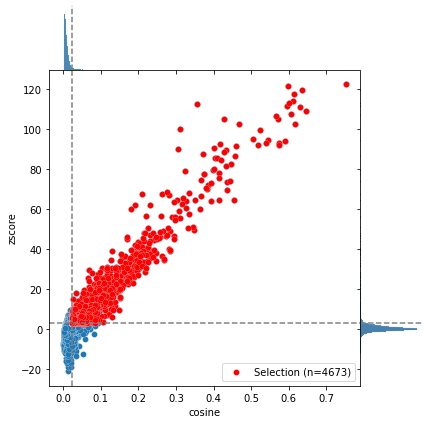

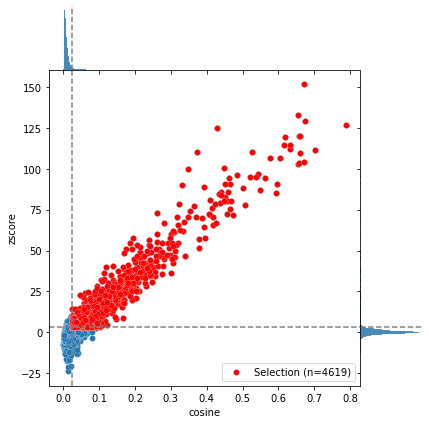

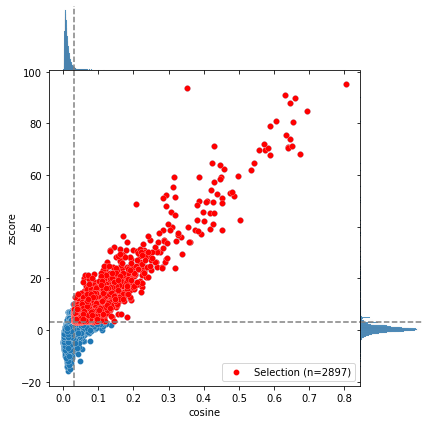

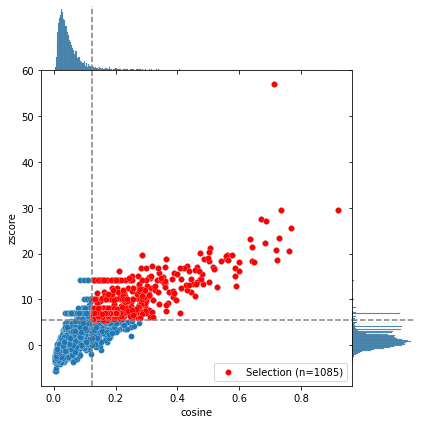

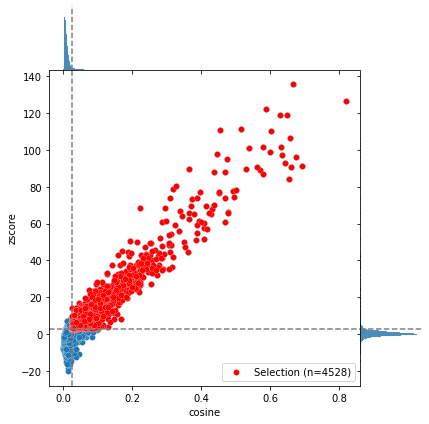

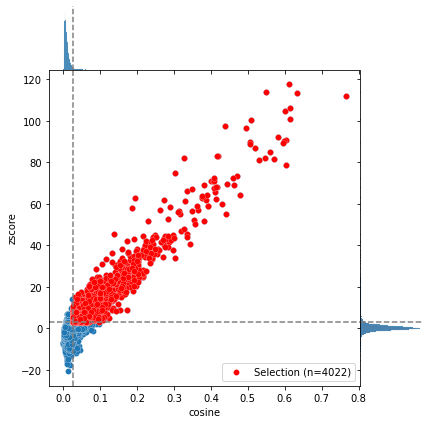

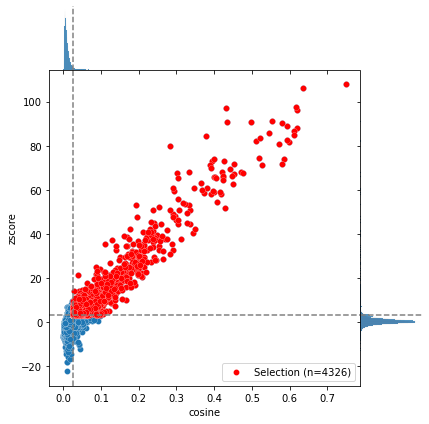

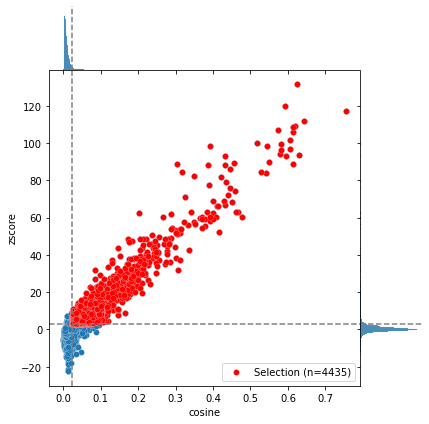

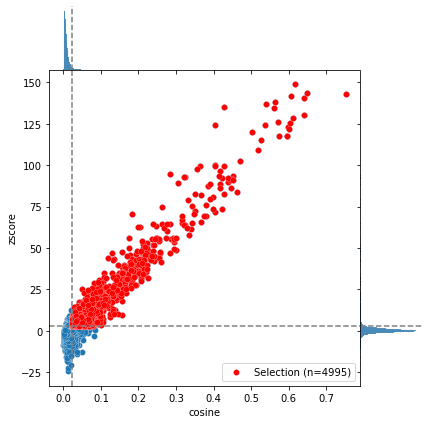

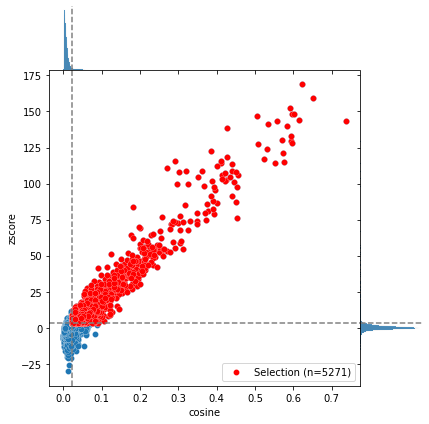

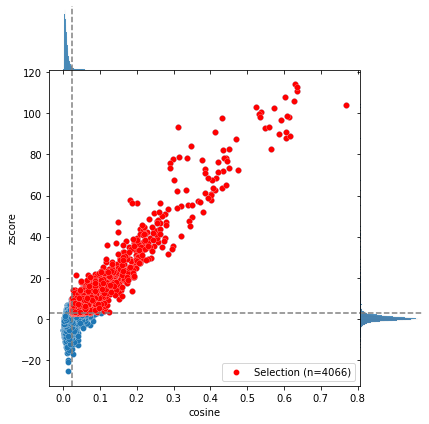

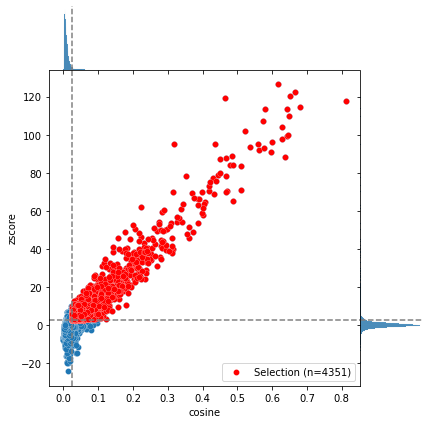

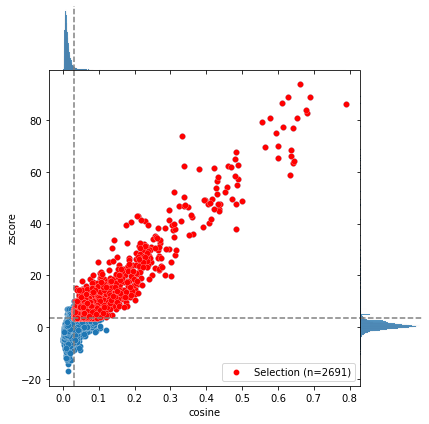

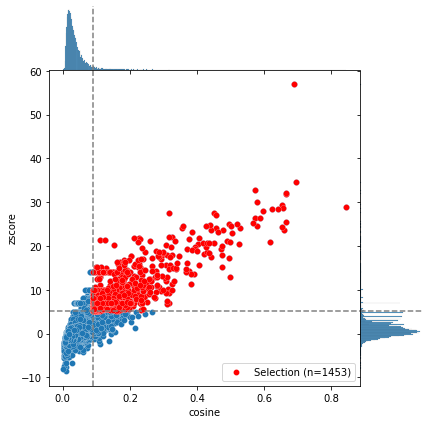

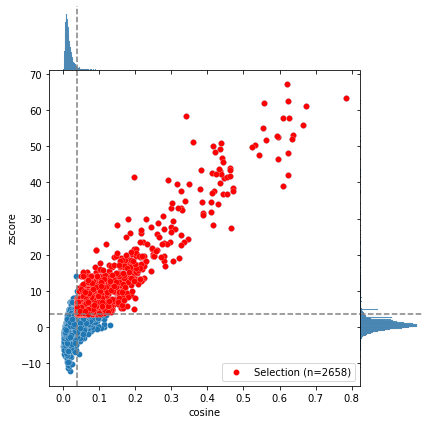

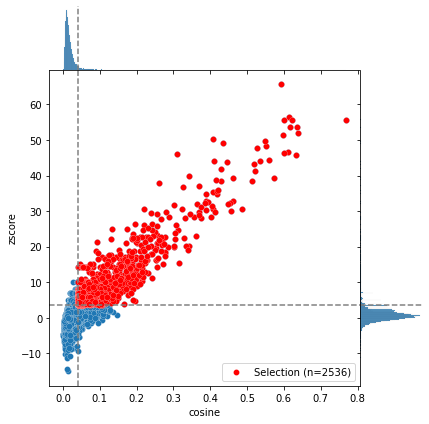

In [80]:
# check original market basket analysis for count of tf-cooccurences
print(compare_obj.rules.shape)
count_of_all = 0
count_of_all_significant = 0
for obj in combObj_to_compare:
    print(obj.prefix)
    print(obj.rules.shape)
    obj.simplify_rules()
    print(obj.rules.shape)
    count_of_all = count_of_all + obj.rules.shape[0]
    sig = obj.select_significant_rules()
    print(sig.rules.shape)
    count_of_all_significant = count_of_all_significant + sig.rules.shape[0]

print("all simplyfied for tissue")
print(count_of_all)    
print("all simplyfied for tissue and significant")
print(count_of_all_significant) 
   
    

## Old: Self implemented - Differential analysis - comparing each cluster

In [ ]:
# Diff analysis between each cluster:
for i, file in enumerate(files_main_mb):
    print(file)
    name_i = file.split('.pkl')[0]
    
    for j in range(i + 1, len(files_main_mb), 1):
        file_j = files_main_mb[j]
        name_j = file_j.split('.pkl')[0]
        print(j)
        print(name_j)
        A = CombObj().from_pickle(f"{main_analysis_path}{file}")
        print(A)
        A.set_prefix(name_i)
        B = CombObj().from_pickle(f"{main_analysis_path}{file_j}")
        print(B)
        B.set_prefix(name_j)
        compare_obj = A.compare(B)
        compare_obj.to_pickle(f'{differential_analysis_path}{name_i}__{name_j}.pkl')
        
        selected_std = compare_obj.select_rules()
        
        #TODO: Save autamatically generated thresholds
        # utils.get_threshold(new.rules.iloc[:,4], 'both', percent=0.05)
        # logfc threshold (-xxx , +xxx)
        #  utils.get_threshold(new.rules.iloc[:,2:4].mean(axis=1), 'upper', percent=0.05)
        # cosine threshold
        selected_std.to_pickle(f'{differential_analysis_selection_path}{name_i}__{name_j}.pkl')
        
        break;
        
        
print("Done differential analysis")

## Specific analysis:
### Question:
Does the cluster 'right-lobe-of-liver.1.pkl' have specific tf-co-occurences, which can´t be found in the other clusters of the right-lobe-of-liver. ? Which are those tf-co and how many are there?
####  Steps:
    - Take all differential mb-analysis of cluster one. Merge them to a pandas dataframe.
    - Remove All diff tf-co´s which are found twice in the analysis.
    
    TODO:
    - simplify_rules für die selection einbauen
    - classify neg_pos foldchanges 'positiv', 'negativ'
    - Merge Diff_analysis für einen gesamten cluster zu großen dataframe (outer join, nicht inner join wie jetzt), um das dann auszuwerten 
    

In [63]:
# Analyses with whole diffcombj
diff_file_names=read_in_file_names_of_folder(rel_path=differential_analysis_path)

normalized_diff_objects = []
diff_objects = []

for file in diff_file_names:
    obj = DiffCombObj().from_pickle(f"{differential_analysis_path}{file}")
    if "normalized" in file:
        normalized_diff_objects.append(obj)
    else:
        diff_objects.append(obj)

print(normalized_diff_objects)
print(diff_objects) 

normalized_dfs = []
for obj in normalized_diff_objects:
    normalized_dfs.append(obj.rules)
print("Done: Preparing rules of DiffObj")    

Done: Preparing rules of DiffObj


In [ ]:
obj = normalized_diff_objects[0]
t = normalized_diff_objects[0].rules
t[t['right-lobe-of-liver.10_cosine'] > 0.7]
obj.rules

In [64]:
def get_significant_log2fc_rules(df:pd.DataFrame, threshold_percent=0.05):
    reduced_df = df.copy(deep=True)
    for col in df.columns:
        measure_threshold = utils.get_threshold(df[col], "both", percent=threshold_percent)
        upper_threshold = measure_threshold[1]
        lower_threshold = measure_threshold[0]
        reduced_df = reduced_df[(reduced_df[col] > upper_threshold) | (reduced_df[col] < lower_threshold)]
    return reduced_df

In [70]:
results_df = []
for df in normalized_dfs:
    for i, file in enumerate(files_main_mb):
        # print(file)
        cluster_name = file.split('.pkl')[0]
        print(cluster_name)
        
        # reduce to relevant columns of cluster
        cluster_cols = list(filter(lambda x: f'{cluster_name}' in x , df.columns))
        # NOT WORKING: logfc_cluster_cols = list(filter(lambda x: (f'{cluster_name}/' || f'/{cluster_name}') in x , cluster_cols)) 
        # This is important: for right-lob-of-liver-1 
        logfc_cluster_cols = []
        for entry in cluster_cols:
            if (f'{cluster_name}/' in entry) or (f'/{cluster_name}_cosine_log2fc' in entry):
                logfc_cluster_cols.append(entry)
        
        #print(logfc_cluster_cols)
        print(len(logfc_cluster_cols))
        #print(logfc_cluster_cols)
        
        reduced_df = df[logfc_cluster_cols]
        print(f'Initial Count: {reduced_df.shape}')
        
        # Count all entries in a row , which do not have a zero(0.00) in it.
        # e.g. 15 cols have 0.00 => val_counts = 0, 10 cols not have a 0.00 => val_counts = 10 
        val_counts = reduced_df[~reduced_df.isin([0])].count(axis=1).sort_values()
        #print(tmp_val_counts)
        # Set threshold 
        selection_threshold = len(logfc_cluster_cols) # z.B 15 could be varyied
        
        ## Keep all entries,which do have more values different higher than the threshold
        tfs_occ = val_counts[val_counts >= selection_threshold].index
        result = reduced_df.loc[tfs_occ]
        print(f'Zero filtered: {result.shape}')
        
        significants = get_significant_log2fc_rules(result, threshold_percent=0.05)
        results_df.append(significants)
        print(f'Cluster: {cluster_name}: {significants.shape} ,tf-pairs with significant log2fc-changes in comparison to all the other clusters in tissue: {tissue_name} ')
         

right-lobe-of-liver.10
15
Initial Count: (242050, 15)
Zero filtered: (169268, 15)
Cluster: right-lobe-of-liver.10: (10, 15) ,tf-pairs with significant log2fc-changes in comparison to all the other clusters in tissue: right-lobe-of-liver 
right-lobe-of-liver.11
15
Initial Count: (242050, 15)
Zero filtered: (172415, 15)
Cluster: right-lobe-of-liver.11: (18, 15) ,tf-pairs with significant log2fc-changes in comparison to all the other clusters in tissue: right-lobe-of-liver 
right-lobe-of-liver.12
15
Initial Count: (242050, 15)
Zero filtered: (117908, 15)
Cluster: right-lobe-of-liver.12: (309, 15) ,tf-pairs with significant log2fc-changes in comparison to all the other clusters in tissue: right-lobe-of-liver 
right-lobe-of-liver.14
15
Initial Count: (242050, 15)
Zero filtered: (39801, 15)
Cluster: right-lobe-of-liver.14: (155, 15) ,tf-pairs with significant log2fc-changes in comparison to all the other clusters in tissue: right-lobe-of-liver 
right-lobe-of-liver.15
15
Initial Count: (24205

In [104]:
df1 = results_df[0]
print(df1.shape)
df1
# found tf-pairs, which have significant changes in comparison to all the other clusters in the tissue
# this 10 tf-pairs of cluster 10, show significant changes in comparion to all the other clusters in the tissue right lob of liver. 

(10, 15)


,right-lobe-of-liver.10/right-lobe-of-liver.11_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.12_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.14_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.15_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.16_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.17_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.18_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.1_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.2_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.3_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.4_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.5_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.7_cosine_log2fc,right-lobe-of-liver.10/right-lobe-of-liver.8_cosine_log2fc
Dmrt1-PROX1,3.203404,3.203404,3.203404,3.203404,3.203404,3.203404,3.203404,3.203404,3.203404,3.203404,3.203404,3.203404,-1.636305,3.203404,3.203404
EN2-MYBL2,3.437183,3.437183,3.437183,3.437183,3.437183,3.437183,3.437183,3.437183,3.437183,3.437183,3.437183,3.437183,3.437183,3.437183,3.437183
Gmeb1-TBXT,3.422402,3.422402,3.422402,3.422402,3.422402,3.422402,3.422402,3.422402,3.422402,3.422402,3.422402,3.422402,3.422402,3.422402,3.422402
LBX2-MYBL2,3.409604,3.409604,3.409604,3.409604,3.409604,3.409604,3.409604,3.409604,3.409604,3.409604,3.409604,3.409604,3.409604,3.409604,3.409604
OVOL1-TFAP4var.2,3.354246,3.354246,3.354246,3.354246,3.354246,3.354246,3.354246,3.354246,3.354246,3.354246,3.354246,3.354246,3.354246,3.354246,3.354246
Gmeb1-TBX19,3.365791,3.365791,3.365791,3.365791,3.365791,3.365791,3.365791,3.365791,3.365791,3.365791,3.365791,3.365791,3.365791,3.365791,3.365791
ZBED1-FOXP2,3.361635,3.361635,3.361635,3.361635,3.361635,3.361635,3.361635,3.361635,3.361635,3.361635,3.361635,3.361635,3.361635,3.361635,3.361635
HESX1-MYBL1,3.309294,3.309294,3.309294,3.309294,3.309294,3.309294,3.309294,3.309294,3.309294,3.309294,3.309294,3.309294,3.309294,3.309294,3.309294
TFAP2E-THAP1,-2.393025,-2.296906,-3.098879,-2.089878,-3.183589,-2.237874,-2.043855,-1.656704,-1.978765,-2.070732,-2.289484,-2.299451,-3.628660,-1.906192,-2.952619
GCM2-SPDEF,-2.191334,-2.930233,-4.702536,-2.399306,-2.576949,-2.732146,-2.470670,-2.072742,-1.791667,-2.287722,-2.229923,-2.907592,-3.594869,-3.030491,-3.159467


In [74]:
test = compare_obj.rules
df = pd.DataFrame(td.loc['EN2-MYBL2'])
df.head(50)
# Frage an Vanessa. Ist das ein spezifischer für diesen tissue?, weil der der einzige ist der erhöht ist?

,EN2-MYBL2
TF1,EN2
TF2,MYBL2
right-lobe-of-liver.10_cosine,0.028493
right-lobe-of-liver.11_cosine,0.0
right-lobe-of-liver.12_cosine,0.0
right-lobe-of-liver.14_cosine,0.0
right-lobe-of-liver.15_cosine,0.0
right-lobe-of-liver.16_cosine,0.0
right-lobe-of-liver.17_cosine,0.0
right-lobe-of-liver.18_cosine,0.0


In [103]:
# cluster 6
df1 = results_df[13]
print(df1.shape)
df1.head(50)
df1.loc['Sox17-Dlx4':'TP63-FOSJUNB']

(188, 15)


,right-lobe-of-liver.10/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.11/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.12/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.14/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.15/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.16/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.17/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.18/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.1/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.2/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.3/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.4/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.5/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.6/right-lobe-of-liver.7_cosine_log2fc,right-lobe-of-liver.6/right-lobe-of-liver.8_cosine_log2fc
Sox17-Dlx4,-4.518151,-4.518151,-4.518151,-4.518151,-4.518151,-4.518151,-4.518151,-4.518151,-4.518151,-4.518151,-4.518151,-4.518151,-4.518151,4.518151,4.518151
TP63-FOSJUNB,-4.475233,-4.475233,-4.475233,-4.475233,-4.475233,-4.475233,-4.475233,-4.475233,-4.475233,-4.475233,-4.475233,-4.475233,-4.475233,4.475233,4.475233


In [ ]:
# filtering if, nan values occure
filtered = df[logfc_cluster_cols]

val_counts = filtered.count(axis=1).sort_values()
#print(val_counts)
tfs_occ = val_counts[val_counts >=16].index
final = filtered.loc[tfs_occ]

In [ ]:
df = normalized_dfs[0]
cluster_name = "right-lobe-of-liver.1"
cluster_cols = list(filter(lambda x: f'{cluster_name}' in x , df.columns))
# NOT WORKING: logfc_cluster_cols = list(filter(lambda x: (f'{cluster_name}/' || f'/{cluster_name}') in x , cluster_cols)) 
# This is important: for right-lob-of-liver-1 
logfc_cluster_cols = []
for entry in cluster_cols:
    if (f'{cluster_name}/' in entry) or (f'/{cluster_name}_cosine_log2fc' in entry):
        logfc_cluster_cols.append(entry)
        
tmp = df[logfc_cluster_cols]
# wtf, tmp[~tmp.isin([0])]??
tmp_val_counts = tmp[~tmp.isin([0])].count(axis=1).sort_values()
#print(tmp_val_counts)
tmp_tfs_occ = tmp_val_counts[tmp_val_counts == len(logfc_cluster_cols)].index
result = tmp.loc[tmp_tfs_occ]
print(result.shape)
result

In [22]:
df = normalized_dfs[0]
cluster_name = "right-lobe-of-liver.1"
cluster_cols = list(filter(lambda x: f'{cluster_name}' in x , df.columns))
# NOT WORKING: logfc_cluster_cols = list(filter(lambda x: (f'{cluster_name}/' || f'/{cluster_name}') in x , cluster_cols)) 
# This is important: for right-lob-of-liver-1 
logfc_cluster_cols = []
for entry in cluster_cols:
    if (f'{cluster_name}/' in entry) or (f'/{cluster_name}_cosine_log2fc' in entry):
        logfc_cluster_cols.append(entry)
        
tmp = df[logfc_cluster_cols]
tmp

,right-lobe-of-liver.10/right-lobe-of-liver.1_cosine_log2fc,right-lobe-of-liver.11/right-lobe-of-liver.1_cosine_log2fc,right-lobe-of-liver.12/right-lobe-of-liver.1_cosine_log2fc,right-lobe-of-liver.14/right-lobe-of-liver.1_cosine_log2fc,right-lobe-of-liver.15/right-lobe-of-liver.1_cosine_log2fc,right-lobe-of-liver.16/right-lobe-of-liver.1_cosine_log2fc,right-lobe-of-liver.17/right-lobe-of-liver.1_cosine_log2fc,right-lobe-of-liver.18/right-lobe-of-liver.1_cosine_log2fc,right-lobe-of-liver.1/right-lobe-of-liver.2_cosine_log2fc,right-lobe-of-liver.1/right-lobe-of-liver.3_cosine_log2fc,right-lobe-of-liver.1/right-lobe-of-liver.4_cosine_log2fc,right-lobe-of-liver.1/right-lobe-of-liver.5_cosine_log2fc,right-lobe-of-liver.1/right-lobe-of-liver.6_cosine_log2fc,right-lobe-of-liver.1/right-lobe-of-liver.7_cosine_log2fc,right-lobe-of-liver.1/right-lobe-of-liver.8_cosine_log2fc
E2F3-E2F1,-4.237532,0.116025,0.577390,-4.237532,0.267555,-4.237532,-4.237532,0.147322,0.114380,-0.579283,-0.148969,4.237532,4.237532,4.237532,-1.448525
E2F1-E2F3,-4.237532,0.116025,0.577390,-4.237532,0.267555,-4.237532,-4.237532,0.147322,0.114380,-0.579283,-0.148969,4.237532,4.237532,4.237532,-1.448525
E2F2-E2F1,-4.120984,0.212239,0.494197,-4.120984,0.295532,-4.120984,-4.120984,0.199864,0.155506,-0.436690,-0.225172,4.120984,4.120984,4.120984,-1.523356
E2F1-E2F2,-4.120984,0.212239,0.494197,-4.120984,0.295532,-4.120984,-4.120984,0.199864,0.155506,-0.436690,-0.225172,4.120984,4.120984,4.120984,-1.523356
E2F2-E2F3,-4.085741,0.160849,0.573417,-4.085741,0.192809,-4.085741,-4.085741,0.109365,0.074053,-0.315436,-0.163651,4.085741,4.085741,4.085741,-1.280604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAX-OVOL1,1.313612,-2.801956,-2.801956,-2.801956,-2.801956,-2.801956,-2.801956,0.527531,-0.821960,2.801956,-0.318614,2.801956,2.801956,2.801956,2.801956
MYBL1-TFAP4var.2,1.436321,-2.680654,-2.680654,-2.680654,-2.680654,-2.680654,-2.680654,0.551422,2.680654,2.680654,2.680654,2.680654,2.680654,2.680654,2.680654
TFAP4var.2-MYBL1,1.436321,-2.680654,-2.680654,-2.680654,-2.680654,-2.680654,-2.680654,0.551422,2.680654,2.680654,2.680654,2.680654,2.680654,2.680654,2.680654
OVOL1-HESX1,1.256341,-3.093283,-3.093283,-3.093283,-3.093283,-3.093283,-3.093283,0.496261,0.195367,3.093283,-0.339427,3.093283,3.093283,3.093283,3.093283


In [ ]:
measure_threshold_1 = utils.get_threshold(result['right-lobe-of-liver.10/right-lobe-of-liver.1_cosine_log2fc']
                                        , "both", percent=0.05)
measure_threshold_2 = utils.get_threshold(result['right-lobe-of-liver.11/right-lobe-of-liver.1_cosine_log2fc']
                                        , "both", percent=0.05)
print(f'1: {measure_threshold_1}')
print(f'1: {measure_threshold_2}')

In [ ]:
measure_threshold_1[1]

In [ ]:
#t[t['right-lobe-of-liver.10_cosine'] > 0.7]
reduced_result_1 = result[(result['right-lobe-of-liver.10/right-lobe-of-liver.1_cosine_log2fc'] > measure_threshold_1[1]) | (result['right-lobe-of-liver.10/right-lobe-of-liver.1_cosine_log2fc'] < measure_threshold_1[0])]
reduced_result = reduced_result_1[(reduced_result_1['right-lobe-of-liver.11/right-lobe-of-liver.1_cosine_log2fc'] > measure_threshold_2[1]) | (reduced_result_1['right-lobe-of-liver.11/right-lobe-of-liver.1_cosine_log2fc'] < measure_threshold_2[0])]
reduced_result

In [ ]:
f.describe()

In [ ]:
m1 = pd.DataFrame(result.mean(axis=1), columns=['mean'])
m1['sum'] = result.sum(axis=1)
m1.plot.hist(by='mean', bins=100)
m1

In [ ]:
tmp = filtered.fillna(0)
tmp_val_counts = tmp[~tmp.isin([0])].count(axis=1).sort_values()

print(tmp_val_counts)
tmp_tfs_occ = tmp_val_counts[tmp_val_counts >=16].index
result = filtered.loc[tmp_tfs_occ]

m1 = pd.DataFrame(result.mean(axis=1), columns=['mean'])
m1['sum'] = result.sum(axis=1)
m1.plot.hist(by='mean', bins=100)

## OLD implementation

In [ ]:
def prepare_diff_obj_dataframe(diff_obj: DiffCombObj) -> pd.DataFrame:
    
    # possible prefix names ['right-lobe-of-liver.10', 'right-lobe-of-liver.16']
    df = diff_obj.rules
    tissue_name_c1 , cluster_nr_c1  = diff_obj.prefixes[0].split('.')
    tissue_name_c2 , cluster_nr_c2  = diff_obj.prefixes[1].split('.')
    suff = ""
    if tissue_name_c1 == tissue_name_c2:
        suff += f"_{tissue_name_c1}"
    else:
        suff += f"_{tissue_name_c1}_{tissue_name_c2}"

    if cluster_nr_c1 == cluster_nr_c2:
        suff += f"_{cluster_nr_c1}"
    else:
        suff += f"_{cluster_nr_c1}_{cluster_nr_c2}"

    df['log2fc_class'] = df.apply(lambda x: 'negativ' if x[4] < 0 else 'positiv', axis=1)
    df.columns = [f'{x}{suff}' for x in df.columns]
    
    return df.copy(deep=True)


# Find the specific tf_cooccurences of a tissue that unique for the specific cluster in the tissue.
# 1. Diff analyse , 
# 2. Read in Diffanalyse for the specific cluster
# 3. Find tf-cooccurence of the diffob , which are occuring in each cluster
# Read in file Names of all analysis
files_main_mb= read_in_file_names_of_folder(rel_path=main_analysis_path)
print(f"Count of Files: {len(files_main_mb)}")
#print(f"Files: {files_main_mb}")

files_diff= read_in_file_names_of_folder(rel_path=differential_analysis_path)
print(f"Count of Files: {len(files_diff)}")

test = ""
for file_mb in files_main_mb:
    cluster_name = file_mb.split('.pkl')[0]
    print(cluster_name)
    diffs = list(filter(lambda x: cluster_name in x, files_diff))
    print(len(diffs))
    print(diffs)
    
    # Keeps the read in DiffCombObj diff_objects:
    diff_objects = []
    
    for diff in diffs:
        diff_obj = DiffCombObj().from_pickle(f"{differential_analysis_selection_path}{diff}")
        diff_objects.append(diff_obj)
    
    erg = None
    for i in range(len(diff_objects)-1):
        
        if erg is None:
            obj_1= diff_objects[i]
            obj_2 = diff_objects[i + 1]
            df1 = prepare_diff_obj_dataframe(diff_obj = obj_1)
            df2 = prepare_diff_obj_dataframe(diff_obj = obj_2)
            
            erg = df1.merge(df2, how='outer', left_index=True, right_index=True)
        else:
            obj_2 = diff_objects[i + 1] 
            df2 = prepare_diff_obj_dataframe(diff_obj = obj_2)
            erg = erg.merge(df2, how='outer', left_index=True, right_index=True)
       
    test = erg
    erg.to_pickle(path=f"{answers_path}{cluster_name}.pkl")
    
print("Done")    
test.columns

In [ ]:
answer_file_names=read_in_file_names_of_folder(rel_path=answers_path)
print(answer_file_names)
cluster_dfs = []
df = None
for name in answer_file_names:
    df = pd.read_pickle(f"{answers_path}{name}")
    cluster_dfs.append(name)
    df = df

    #df.groupby(['class', 'value']).count()
    break;
filter_columns = list(filter(lambda x: 'log2fc_class' in x , df.columns))
#len(filter_columns)
filtered_df = df[df[filter_columns].notna().all(1)] #
filtered_df
df
#df3.iloc[:, 2:3]
#df = pd.read_pickle(f"{answers_path}right-lobe-of-liver.6.pkl")
#df = pd.read_pickle(f"{differential_analysis_selection_path}{right-lobe-of-liver.6.pkl}")


#original = CombObj().from_pickle(f"{main_analysis_path}right-lobe-of-liver.6.pkl")
#original.rules.loc[df.index]


In [ ]:
df = pd.read_pickle(f"{answers_path}right-lobe-of-liver.6.pkl")
selection = DiffCombObj().from_pickle(f"{differential_analysis_selection_path}right-lobe-of-liver.10__right-lobe-of-liver.16.pkl")
selection_orig = DiffCombObj().from_pickle(f"{differential_analysis_path}right-lobe-of-liver.10__right-lobe-of-liver.16.pkl")
selection_orig
selection

original = CombObj().from_pickle(f"{main_analysis_path}right-lobe-of-liver.6.pkl")
original.rules.loc[df.index]
selection.prefixes

### Try and Error section

In [ ]:
#mb_obj = CombObj().from_pickle(f"{main_analysis_path}right-lobe-of-liver.10.pkl")
obj_1 = DiffCombObj().from_pickle(f"{differential_analysis_path}right-lobe-of-liver.16__right-lobe-of-liver.1.pkl")
obj_2 = DiffCombObj().from_pickle(f"{differential_analysis_path}right-lobe-of-liver.16__right-lobe-of-liver.2.pkl")
obj_3 = DiffCombObj().from_pickle(f"{differential_analysis_path}right-lobe-of-liver.16__right-lobe-of-liver.3.pkl")
obj_4 = DiffCombObj().from_pickle(f"{differential_analysis_path}right-lobe-of-liver.16__right-lobe-of-liver.4.pkl")
obj_5 = DiffCombObj().from_pickle(f"{differential_analysis_path}right-lobe-of-liver.16__right-lobe-of-liver.5.pkl")
obj_6 = DiffCombObj().from_pickle(f"{differential_analysis_path}right-lobe-of-liver.16__right-lobe-of-liver.6.pkl")
#mb_obj.rules
#type(diff_obj.rules)
#diff_obj2.rules
df_diff = pd.concat([obj_1.rules, obj_2.rules, obj_3.rules, obj_4.rules, obj_5.rules, obj_6.rules], join="inner")



#df_diff2 = pd.concat([diff_obj_1_1.rules,diff_obj2.rules, diff_obj1_2.rules])

unified_duplicates = df_diff[df_diff.duplicated(subset=['TF1', 'TF2'], keep='first')]

df_diff2 = pd.concat([unified_duplicates, diff_obj1_2.rules])

unified_duplicates2 = df_diff2[df_diff2.duplicated(subset=['TF1', 'TF2'], keep='first')]

#df_diff = df_diff.drop_duplicates(subset=['TF1', 'TF2'])
#unified_duplicates
#unified_duplicates
#unified_duplicates2
#diff_obj_1_1.rules
#unified_duplicates



In [ ]:
obj_1 = DiffCombObj().from_pickle(f"{differential_analysis_selection_path}right-lobe-of-liver.16__right-lobe-of-liver.1.pkl")
obj_2 = DiffCombObj().from_pickle(f"{differential_analysis_selection_path}right-lobe-of-liver.16__right-lobe-of-liver.2.pkl")

obj_1.simplify_rules()
obj_2.simplify_rules()
obj3 = obj_1.rules.merge(obj_2.rules, left_index=True, right_index=True, suffixes=(f"_{obj_1.prefixes[0]}_{obj_1.prefixes[1]}", f"_{obj_2.prefixes[0]}_{obj_2.prefixes[1]}"))
obj3


In [ ]:
#df['log2fc_class'] = df.apply(lambda x: 'negativ' if x[4] < 0 else 'positiv', axis=1)

#removedNAN = df[df.notna().all(1)]

#df2 = removedNAN[(removedNAN[filter_columns] > 0.0) | (removedNAN[filter_columns] < 0.0)]
#df2[df2.notna().all(1)]
#filtered_df = df[df[filter_columns].notna().all(1)]

In [ ]:
diff_obj_1_1.rules.loc['Foxd3-ONECUT2']
diff_obj2.rules.loc['Foxd3-ONECUT2']

In [ ]:
top30C = selectedC.select_top_rules(n=30)
top30C.rules.head(31)

In [ ]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo', 'fehler', 'nocheiner'],
                    'value': [1, 2, 3, 5,7,7]},
                   index=['my1', 'my2', 'my3', 'my4', 'my5', 'my6'])
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo','test'],
                    'value': [5, 6, 7, 8, 9]},
                  index=['my1', 'not2', 'my3', 'not4', 'my5'])
df3 = pd.DataFrame({'rkey': ['new', 'lol'],
                    'value': [5, 6]},
                  index=['my1', 'not2'])


#df1.merge(df2, left_on='lkey', right_on='rkey')
#erg = df1.merge(df2, left_index=True, right_index=True, suffixes=("_test", "_test2"))
erg = df1.merge(df2, how='outer', left_index=True, right_index=True, suffixes=("_x", "_y"))
#erg = erg.merge(df3, how='outer', left_index=True, right_index=True, suffixes=("_x", "_"))
erg


In [ ]:
df1

In [ ]:
df2

In [ ]:
df2.columns = [f'{x}_df2' for x in df2.columns]
df2

In [ ]:
[x+ 1 for x in df2.columns]

In [ ]:
df1['class'] = df1.apply(lambda x: 'niedrig' if x[1] < 5 else 'hoch', axis=1) 

In [ ]:
df1[df1['class'] == 'hoch']

In [ ]:
df1.groupby(['class', 'value']).count()

In [ ]:
df2

In [ ]:
df3.iloc[:, 2:3]

In [ ]:
top30C.plot_bubble()

In [ ]:
top30C.plot_network()

In [ ]:
selectedC.rules

In [ ]:
#### OLD 
# Find the specific tf_cooccurences of a tissue that unique for the specific cluster in the tissue.
# 1. Diff analyse , 
# 2. Read in Diffanalyse for the specific cluster
# 3. Find tf-cooccurence of the diffob , which are occuring in each cluster
# Read in file Names of all analysis
files_main_mb= read_in_file_names_of_folder(rel_path=main_analysis_path)
print(f"Count of Files: {len(files_main_mb)}")
#print(f"Files: {files_main_mb}")

files_diff= read_in_file_names_of_folder(rel_path=differential_analysis_path)
print(f"Count of Files: {len(files_diff)}")
#print(f"Files: {files_diff}")
test = ""
for file_mb in files_main_mb:
    cluster_name = file_mb.split('.pkl')[0]
    print(cluster_name)
    diffs = list(filter(lambda x: cluster_name in x, files_diff))
    print(len(diffs))
    print(diffs)
    
    # Keeps the read in DiffCombObj diff_objects:
    diff_objects = []
    
    for diff in diffs:
        diff_obj = DiffCombObj().from_pickle(f"{differential_analysis_selection_path}{diff}")
        diff_objects.append(diff_obj)
    
    # erste DiffObj dataframe 
    initial_df = diff_objects[0].rules
    
    #has neg and pos foldchange
    cross_product_merged = initial_df
    
    # only pos foldchange
    pos_merged = initial_df[initial_df.iloc[:,4] > 0.00]
    
    # only neg foldchange
    neg_merged = initial_df[initial_df.iloc[:,4] < 0.00]
    for i in range(len(diff_objects)-1):
        obj_1= diff_objects[i]
        obj_2 = diff_objects[i + 1]
            
        # cross_product merge rules-dataframe by index (TF´s)
        cross_product = cross_product_merged.merge(obj_2.rules, left_index=True, right_index=True, suffixes=(f"_{obj_1.prefixes[0]}_{obj_1.prefixes[1]}", f"_{obj_2.prefixes[0]}_{obj_2.prefixes[1]}"))
        cross_product_merged = cross_product.copy(deep=True)
        
        # pos merge rules-dataframe by index (TF´s)
        obj2_df_pos = obj_2.rules[obj_2.rules.iloc[:,4] > 0.00]
        df_pos_merged = pos_merged.merge(obj2_df_pos, left_index=True, right_index=True, suffixes=(f"_{obj_1.prefixes[0]}_{obj_1.prefixes[1]}", f"_{obj_2.prefixes[0]}_{obj_2.prefixes[1]}"))
        pos_merged = df_pos_merged.copy(deep=True)
        
        # neg merge rules-dataframe by index (TF´s)
        obj2_df_neg = obj_2.rules[obj_2.rules.iloc[:,4] < 0.00]
        df_neg_merged = neg_merged.merge(obj2_df_neg, left_index=True, right_index=True, suffixes=(f"_{obj_1.prefixes[0]}_{obj_1.prefixes[1]}", f"_{obj_2.prefixes[0]}_{obj_2.prefixes[1]}"))
        neg_merged = df_neg_merged.copy(deep=True)
        
        
    cross_product_merged.to_pickle(path=f"{answers_path}{cluster_name}_cross.pkl")
    pos_merged.to_pickle(path=f"{answers_path}{cluster_name}_pos.pkl")
    neg_merged.to_pickle(path=f"{answers_path}{cluster_name}_neg.pkl")
    
print("Done")    
test
